## 03-01

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
torch.manual_seed(42)

In [4]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [5]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [6]:
w = torch.zeros(1, requires_grad=True)

print(w)

tensor([0.], requires_grad=True)


In [7]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


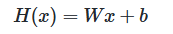

In [8]:
hypothesis = x_train * w + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


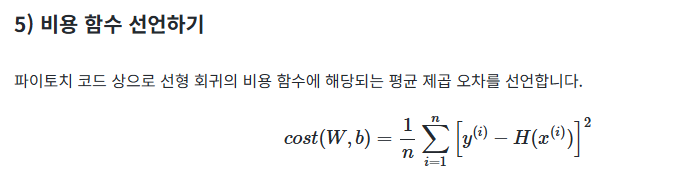

In [9]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [10]:
optimizer = optim.SGD([w,b], lr= 0.01)

In [11]:
#기울기를 0으로 초기화
optimizer.zero_grad()
#비용 함수를 미분하여 기울기 계산산
cost.backward()
#w와 b를 업데이트
optimizer.step()


In [14]:
# 전체 코드 작성

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([w,b], lr=0.01)

epochs = 1500

for epoch in range(epochs+1):
    
    hypothesis = x_train * w + b

    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()


    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs, w.item(), b.item(), cost.item()
        ))

Epoch    0/1500 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1500 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1500 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1500 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1500 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1500 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1500 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1500 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1500 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1500 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1500 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1500 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1500 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1500 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1500 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1500 W: 1.991, b: 0.020 Cost: 0.000057


In [15]:
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20

for epoch in range(nb_epochs+1):
    z = 2*w

    z.backward()
    print("수식을 w로 미분한 값: {}".format(w.grad))

수식을 w로 미분한 값: 2.0
수식을 w로 미분한 값: 4.0
수식을 w로 미분한 값: 6.0
수식을 w로 미분한 값: 8.0
수식을 w로 미분한 값: 10.0
수식을 w로 미분한 값: 12.0
수식을 w로 미분한 값: 14.0
수식을 w로 미분한 값: 16.0
수식을 w로 미분한 값: 18.0
수식을 w로 미분한 값: 20.0
수식을 w로 미분한 값: 22.0
수식을 w로 미분한 값: 24.0
수식을 w로 미분한 값: 26.0
수식을 w로 미분한 값: 28.0
수식을 w로 미분한 값: 30.0
수식을 w로 미분한 값: 32.0
수식을 w로 미분한 값: 34.0
수식을 w로 미분한 값: 36.0
수식을 w로 미분한 값: 38.0
수식을 w로 미분한 값: 40.0
수식을 w로 미분한 값: 42.0


In [17]:
w = torch.tensor(2.0, requires_grad=True)

y = w ** 2
z = 2*y + 5

z.backward()

print("수식을 w로 미분한 값: {}".format(w.grad))

수식을 w로 미분한 값: 8.0


## 03-02 다중 선형 회귀

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
torch.manual_seed(1)

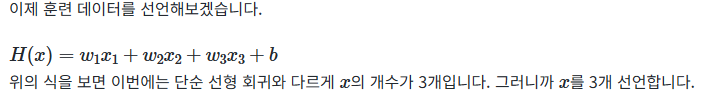

In [4]:
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [5]:
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
optimizer = optim.SGD([w1,w2,w3,b], lr = 1e-5)

epochs = 1000

for epoch in range(epochs+1):

    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch: {:4d}/{} w1:{:.4f},w2:{:.4f},w3:{:.4f},b:{:.4f},cost:{:.6f}'.format(epoch, epochs, w1.item(),w2.item(),w3.item(),b.item(),cost.item()))


Epoch:    0/1000 w1:0.5508,w2:0.5499,w3:0.5571,b:0.0064,cost:2915.712158
Epoch:  100/1000 w1:0.6736,w2:0.6608,w3:0.6762,b:0.0079,cost:1.562279
Epoch:  200/1000 w1:0.6791,w2:0.6548,w3:0.6768,b:0.0081,cost:1.496321
Epoch:  300/1000 w1:0.6844,w2:0.6490,w3:0.6773,b:0.0082,cost:1.433805
Epoch:  400/1000 w1:0.6895,w2:0.6433,w3:0.6778,b:0.0084,cost:1.374573
Epoch:  500/1000 w1:0.6946,w2:0.6378,w3:0.6783,b:0.0085,cost:1.318419
Epoch:  600/1000 w1:0.6995,w2:0.6325,w3:0.6787,b:0.0087,cost:1.265176
Epoch:  700/1000 w1:0.7043,w2:0.6272,w3:0.6791,b:0.0088,cost:1.214724
Epoch:  800/1000 w1:0.7090,w2:0.6222,w3:0.6795,b:0.0090,cost:1.166892
Epoch:  900/1000 w1:0.7136,w2:0.6172,w3:0.6798,b:0.0091,cost:1.121545
Epoch: 1000/1000 w1:0.7180,w2:0.6124,w3:0.6801,b:0.0092,cost:1.078541


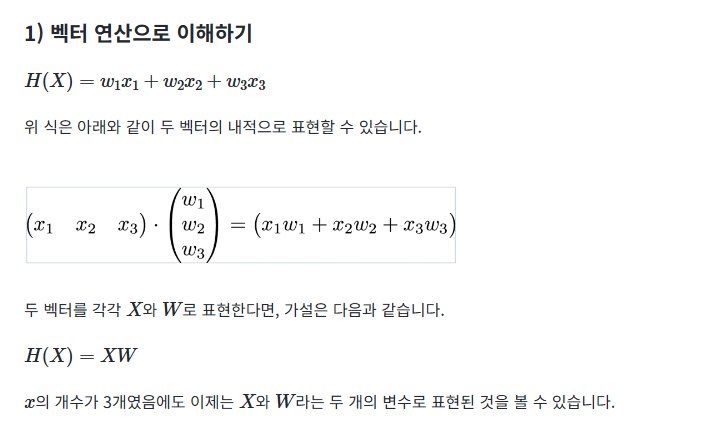

벡터 연산으로 하는 이유 x 변수가 1000개가 된다면 w를 1000개 선언 해야 하기 때문 즉 선언만 2000개를 해야 하는 상황

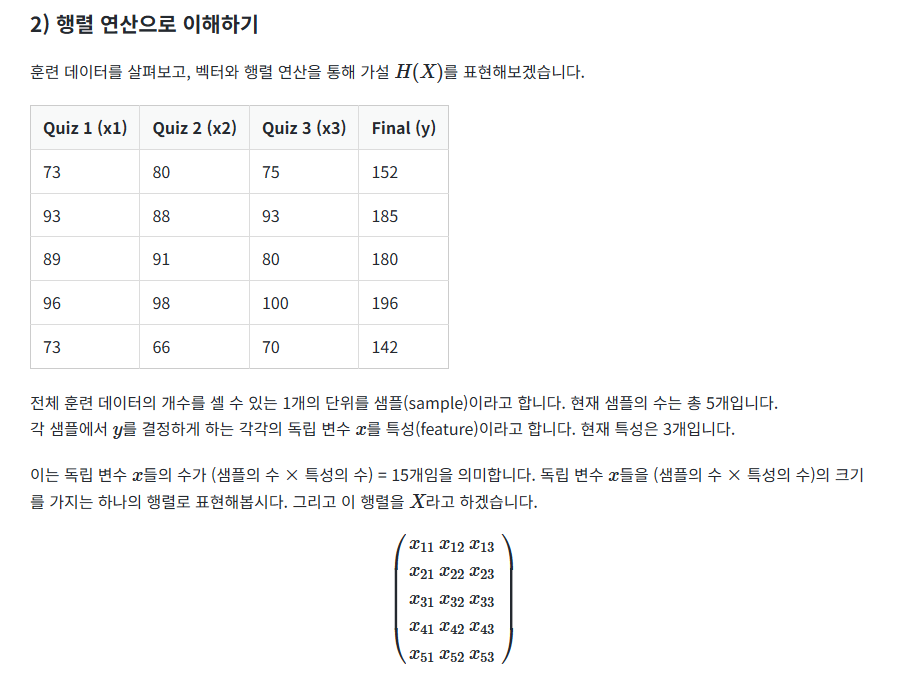
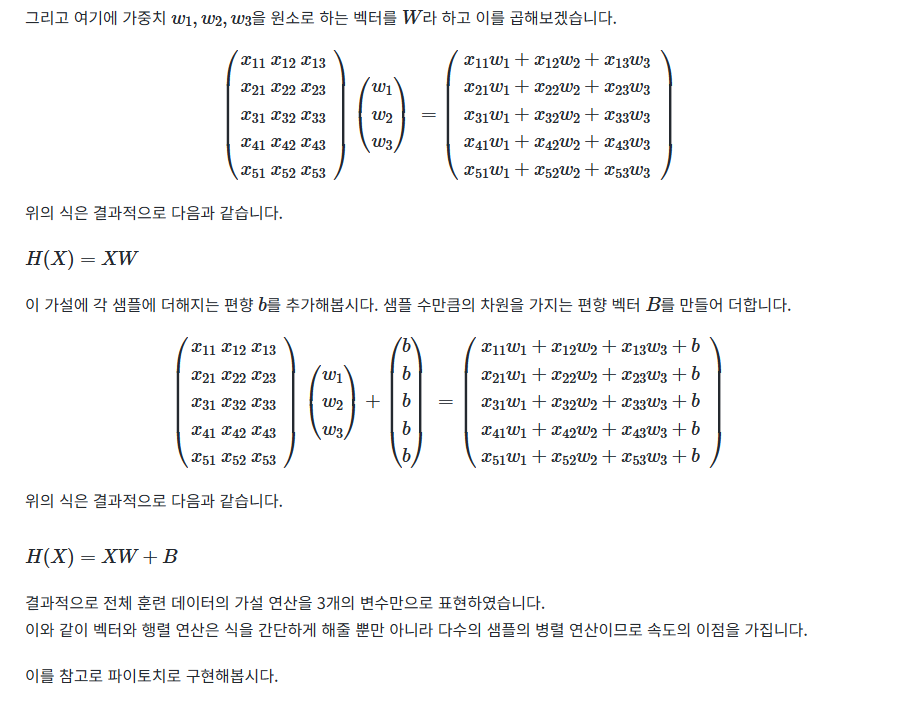

In [15]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])


In [16]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [17]:
w = torch.zeros((3,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
optimizer = optim.SGD([w,b], lr= 1e-5)

epochs = 20

for epoch in range(epochs+1):

    hypothesis = x_train.matmul(w) + b

    cost = torch.mean((hypothesis - y_train) ** 2)

    # gradient를 0으로 초기화
    optimizer.zero_grad() 
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() 
    # W와 b를 업데이트
    optimizer.step() 

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
    epoch, epochs, hypothesis.squeeze().detach(), cost.item()
    ))



Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670898
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.482086
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

In [19]:
# 임의의 값 예측

with torch.no_grad():
    new_input = torch.FloatTensor([[75,85,72]])
    pred = new_input.matmul(w) + b
    print(pred)

tensor([[156.8051]])


## 03-03 nn.Module과 클래스로 구현하기

In [21]:
# 위에서 만들었던 선형 회귀 모델은 이미 파이토치에 구현이 되어 있음

import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(82)

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

model = nn.Linear(1,1)

print(list(model.parameters()))


[Parameter containing:
tensor([[-0.0845]], requires_grad=True), Parameter containing:
tensor([0.0630], requires_grad=True)]


In [23]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 2000

for epoch in range(epochs+1):
    
    pred = model(x_train)

    cost = F.mse_loss(pred,y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, epochs, cost.item()
      ))

Epoch    0/2000 Cost: 15.634937
Epoch  100/2000 Cost: 0.059480
Epoch  200/2000 Cost: 0.036755
Epoch  300/2000 Cost: 0.022712
Epoch  400/2000 Cost: 0.014035
Epoch  500/2000 Cost: 0.008673
Epoch  600/2000 Cost: 0.005359
Epoch  700/2000 Cost: 0.003312
Epoch  800/2000 Cost: 0.002046
Epoch  900/2000 Cost: 0.001265
Epoch 1000/2000 Cost: 0.000781
Epoch 1100/2000 Cost: 0.000483
Epoch 1200/2000 Cost: 0.000298
Epoch 1300/2000 Cost: 0.000184
Epoch 1400/2000 Cost: 0.000114
Epoch 1500/2000 Cost: 0.000070
Epoch 1600/2000 Cost: 0.000044
Epoch 1700/2000 Cost: 0.000027
Epoch 1800/2000 Cost: 0.000017
Epoch 1900/2000 Cost: 0.000010
Epoch 2000/2000 Cost: 0.000006


다중 선형 회귀 구현하기

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = nn.Linear(3,1)

print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)  # 0.01 로 하지 않는 이유는 발산하기 때문

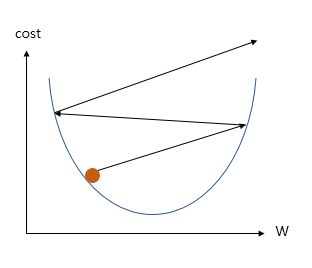

In [27]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/2000 Cost: 31667.599609
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210559
Epoch 1100/2000 Cost: 0.209230
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206762
Epoch 1400/2000 Cost: 0.205618
Epoch 1500/2000 Cost: 0.204529
Epoch 1600/2000 Cost: 0.203481
Epoch 1700/2000 Cost: 0.202486
Epoch 1800/2000 Cost: 0.201539
Epoch 1900/2000 Cost: 0.200634
Epoch 2000/2000 Cost: 0.199770


모델을 클래스로 구현하기

In [28]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

        def forward(self, x):
            return self.linear(x)
        
model = LinearRegressionModel()

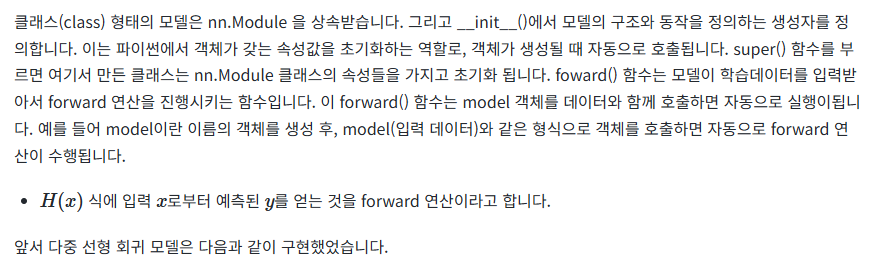

In [31]:
# 다중 선형 회귀는 nn.Linear()만 바꿔주면 되니 패스

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

In [32]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 2000

for epoch in range(epochs+1):

    pred = model(x_train)

    cost = F.mse_loss(pred,y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))


Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


## 03-04 미니 배치와 데이터 로더

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [2]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])


In [4]:
dataset = TensorDataset(x_train, y_train)

In [6]:
dataloader = DataLoader(dataset, batch_size=2 , shuffle=True)

In [9]:
model = nn.Linear(3,1)
optimizer = optim.SGD(model.parameters(), lr=1e-5)

epochs = 20

for epoch in range(epochs+1):
    for batch_idx, samples in enumerate(dataloader):

        x_train , y_train = samples

        pred = model(x_train)

        cost = F.mse_loss(pred, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))


Epoch    0/20 Batch 1/3 Cost: 35266.851562
Epoch    0/20 Batch 2/3 Cost: 9029.753906
Epoch    0/20 Batch 3/3 Cost: 4374.762695
Epoch    1/20 Batch 1/3 Cost: 810.444824
Epoch    1/20 Batch 2/3 Cost: 361.747772
Epoch    1/20 Batch 3/3 Cost: 94.043472
Epoch    2/20 Batch 1/3 Cost: 26.904119
Epoch    2/20 Batch 2/3 Cost: 14.254286
Epoch    2/20 Batch 3/3 Cost: 0.407161
Epoch    3/20 Batch 1/3 Cost: 6.635478
Epoch    3/20 Batch 2/3 Cost: 2.019661
Epoch    3/20 Batch 3/3 Cost: 4.292893
Epoch    4/20 Batch 1/3 Cost: 3.438986
Epoch    4/20 Batch 2/3 Cost: 4.609314
Epoch    4/20 Batch 3/3 Cost: 0.406597
Epoch    5/20 Batch 1/3 Cost: 4.252230
Epoch    5/20 Batch 2/3 Cost: 0.614463
Epoch    5/20 Batch 3/3 Cost: 7.228152
Epoch    6/20 Batch 1/3 Cost: 2.522784
Epoch    6/20 Batch 2/3 Cost: 6.540612
Epoch    6/20 Batch 3/3 Cost: 0.041614
Epoch    7/20 Batch 1/3 Cost: 6.529393
Epoch    7/20 Batch 2/3 Cost: 1.081241
Epoch    7/20 Batch 3/3 Cost: 0.485095
Epoch    8/20 Batch 1/3 Cost: 5.736480
Epoch   

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])

        return x, y
